### Correlation and Covariance

Correlation and covariance are measures of linear dependence between two random variables. 
### 1. Covariance

Covariance is a measure of the joint variability of two random variables.It is a mathematical relationship that is defined as:

$$Cov(X,Y) = E[(X − E[X])(Y − E[Y])]$$

The sign of the covariance shows the tendency in the **linear** relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, shows by its magnitude the strength of the linear relation.

We can rewrite the above equation to get an equivalent equation:

$$Cov(X,Y) = E[XY] − E[Y]E[X]$$

#### 1.1 Uncorrelation v.s. Independence
Random variables whose covariance is zero are called **uncorrelated**. If two variables are uncorrelated, there is no linear relationship between them.

Two random varibles $X$ and $Y$ are **independent** if and only if their joint probability equals the product of their probabilities:

$$P(X \cap Y) = P(X)P(Y)$$

If $X$ and $Y$are independent $\Longrightarrow$ Their covariance is zero $\Longrightarrow$ $X$ and $Y$ are uncorrelated

$$E[XY] = E[X]E[Y]$$

$$Cov(X,Y) = E[XY] − E[Y]E[X] = 0$$

** However, the reverse is not true in general**: If $X$ and $Y$ are uncorrelated $\nRightarrow$ $X$ and $Y$are independent

if the covariance of two random variables is 0, they can still be (non-linearly) dependent!

### 2. Correlation

Covariance is interesting because it is a quantitative measurement of the relationship between two variables. Correlation between two random variables, $\rho{(X,Y)}$ (a.k.s.  "the correlation coefficient"), is the covariance of the two variables normalized by the variance of each variable. This normalization cancels the units out and
normalizes the measure so that it is always in the range $[0, 1]$:

$$\rho{(X,Y)} = \frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}$$

Correlation measures linearity between X and Y.
$$\rho{(X,Y)} = 1 \Longrightarrow Y = aX + b\\
\rho{(X,Y)} = −1 \Longrightarrow Y = -aX + b \\
\rho{(X,Y)} = 0 \Longrightarrow\color{red}{\text{Absence of linear relationship}} $$

If $\rho{(X,Y)} = 0$ we say that X and Y are “uncorrelated.” If two variables are independent, then their
correlation will be 0. However, like with covariance the reverse is not true: **A correlation of 0 does not imply independence.**

When people use the term correlation, they are actually referring to a specific type of correlation called **Pearson Correlation**. It measures the degree to which there is a linear relationship between the two variables. An alternative measure is **Spearman Correlation**, which has a formula almost identical to the correlation defined above, with the exception that the underlying random variables are first transformed into their rank. We will discuss further details about these two statistics in another tutorial.

#### 2.1 Correlation vs. Causation

* **Correlation** is a statistical measure that describes the size and direction of the linear relationship between two or more variables. A correlation between variables, however, does $\color{red}{\text{not}}$ mean that the change in one variable is the cause of the change in the values of the other variable.

* **Causation** indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.


**How can we test for causaton?**

Theoretically, the difference between the two types of relationships are easy to identify — an action or occurrence can cause another (e.g. smoking causes an increase in the risk of developing lung cancer), or it can correlate with another (e.g. smoking is correlated with alcoholism, but it does not cause alcoholism). In practice, however, it remains difficult to clearly establish cause and effect.

The use of a **controlled study** is the most effective way of establishing causality between variables. For example, in medical research, the sample or population is split in two, with both groups being comparable in almost every way. The two groups then receive different treatments, and the outcomes of each group are assessed. one group may receive a placebo while the other group is given a new type of medication. If the two groups have noticeably different outcomes, the different experiences may have caused the different outcomes.

### 3. Calculate covariance and correlation using python

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
house_data = pd.read_csv('C:/Users/wenxu/Desktop/R_tutorial/house_price.csv')
house_data.select_dtypes(exclude=[np.object]).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [42]:
# Calculate covariance and correlation with numpy
print('Covariance matrix:')
covariance = np.cov(house_data['LotArea'], house_data['SalePrice']) 
display(covariance)
print('------------------------------------------')
print('Correlation matrix:')
correlation = np.corrcoef(house_data['LotArea'], house_data['SalePrice']) 
display(correlation)

Covariance matrix:


array([[9.96256497e+07, 2.09211070e+08],
       [2.09211070e+08, 6.31111126e+09]])

------------------------------------------
Correlation matrix:


array([[1.        , 0.26384335],
       [0.26384335, 1.        ]])

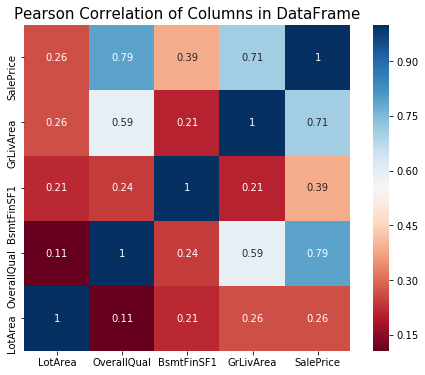

In [57]:
# Calculate the correlation between columns in dataframe
# Then visualize the correlation matrix using heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Columns in DataFrame', y=1, size=15)
tmp = house_data[['LotArea', 'OverallQual', 'BsmtFinSF1',
                  'GrLivArea', 'SalePrice']].copy()
ax = sns.heatmap(tmp.corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)
ax.set_ylim([0, 5])
plt.show()